# E-Commerce goods shipment duration prediction and estimating late delivery risk

E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The classification model built can enable E-commerce and Goods/products delivery industries to identify the **risk of late delivery** and **predict the fastest and normal duration of goods shipment** for their Inland and foreign clients/ customers/buyers.

## Goal :
*  Building a Multi-Output Decision Tree Regressor to determine the **maximum range of shipping time**, by predicting the Fastest and Normal duration for shipping of goods for both Inland and International customers.
*  Building a Binary Classifier to **classify orders with high probabilty of late delivery** (Late Delivery Risk analyser).

## Data :
* A dataset of supply chains used by the company DataCo Global, was used for the analysis.
* Dataset link : https://data.mendeley.com/datasets/8gx2fvg2k6/5

# 1. Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Viewing the dataset

In [3]:
data = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
data.head(8)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,XXXXXXXXX,Kimberly,19488,Flowers,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,19488,1/13/2018 11:03,75935,1360,32.779999,0.10,179250,327.75,0.06,1,327.75,294.980011,18.580000,Oceania,Queensland,CANCELED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,1/13/2018 10:42,75934,1360,39.330002,0.12,179249,327.75,

In [4]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Mostly all entries are non-null, except **'Order Zipcode'** and **'Product Description'** column (we will drop those columns)

# 3. Exploratory data analysis (EDA)

In [7]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))

data_info(data)

1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 29
5) Count of Categorical Features : 24


## 3.1. Null value analysis

In [8]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of total missing values is ' ,round(x,2) ,'%')
    print('Null value estimation ->')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The feature ', i,' has '+ str(data[i].isna().sum()) + ' (' +str((data[i].isna().sum()/data[i].shape[0]).round(4)) + "%)" + ' missing values')

            
features_with_missing_values(data)

Percentage of total missing values is  3.51 %
Null value estimation ->
The feature  Customer Lname  has 8 (0.0%) missing values
The feature  Customer Zipcode  has 3 (0.0%) missing values
The feature  Order Zipcode  has 155679 (0.8624%) missing values
The feature  Product Description  has 180519 (1.0%) missing values


## 3.2. Target variable analysis

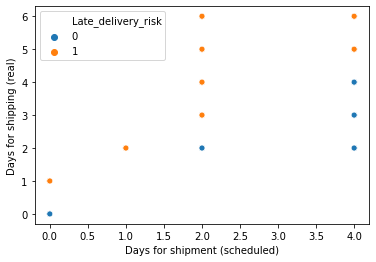

In [9]:
# sns.set()
sns.scatterplot(x="Days for shipment (scheduled)",y="Days for shipping (real)",hue="Late_delivery_risk",data=data)
# 1 -> late delivery
# 0 -> on-time delivery
# when real time needed > scheduled time

## 3.3. Correlation heatmap

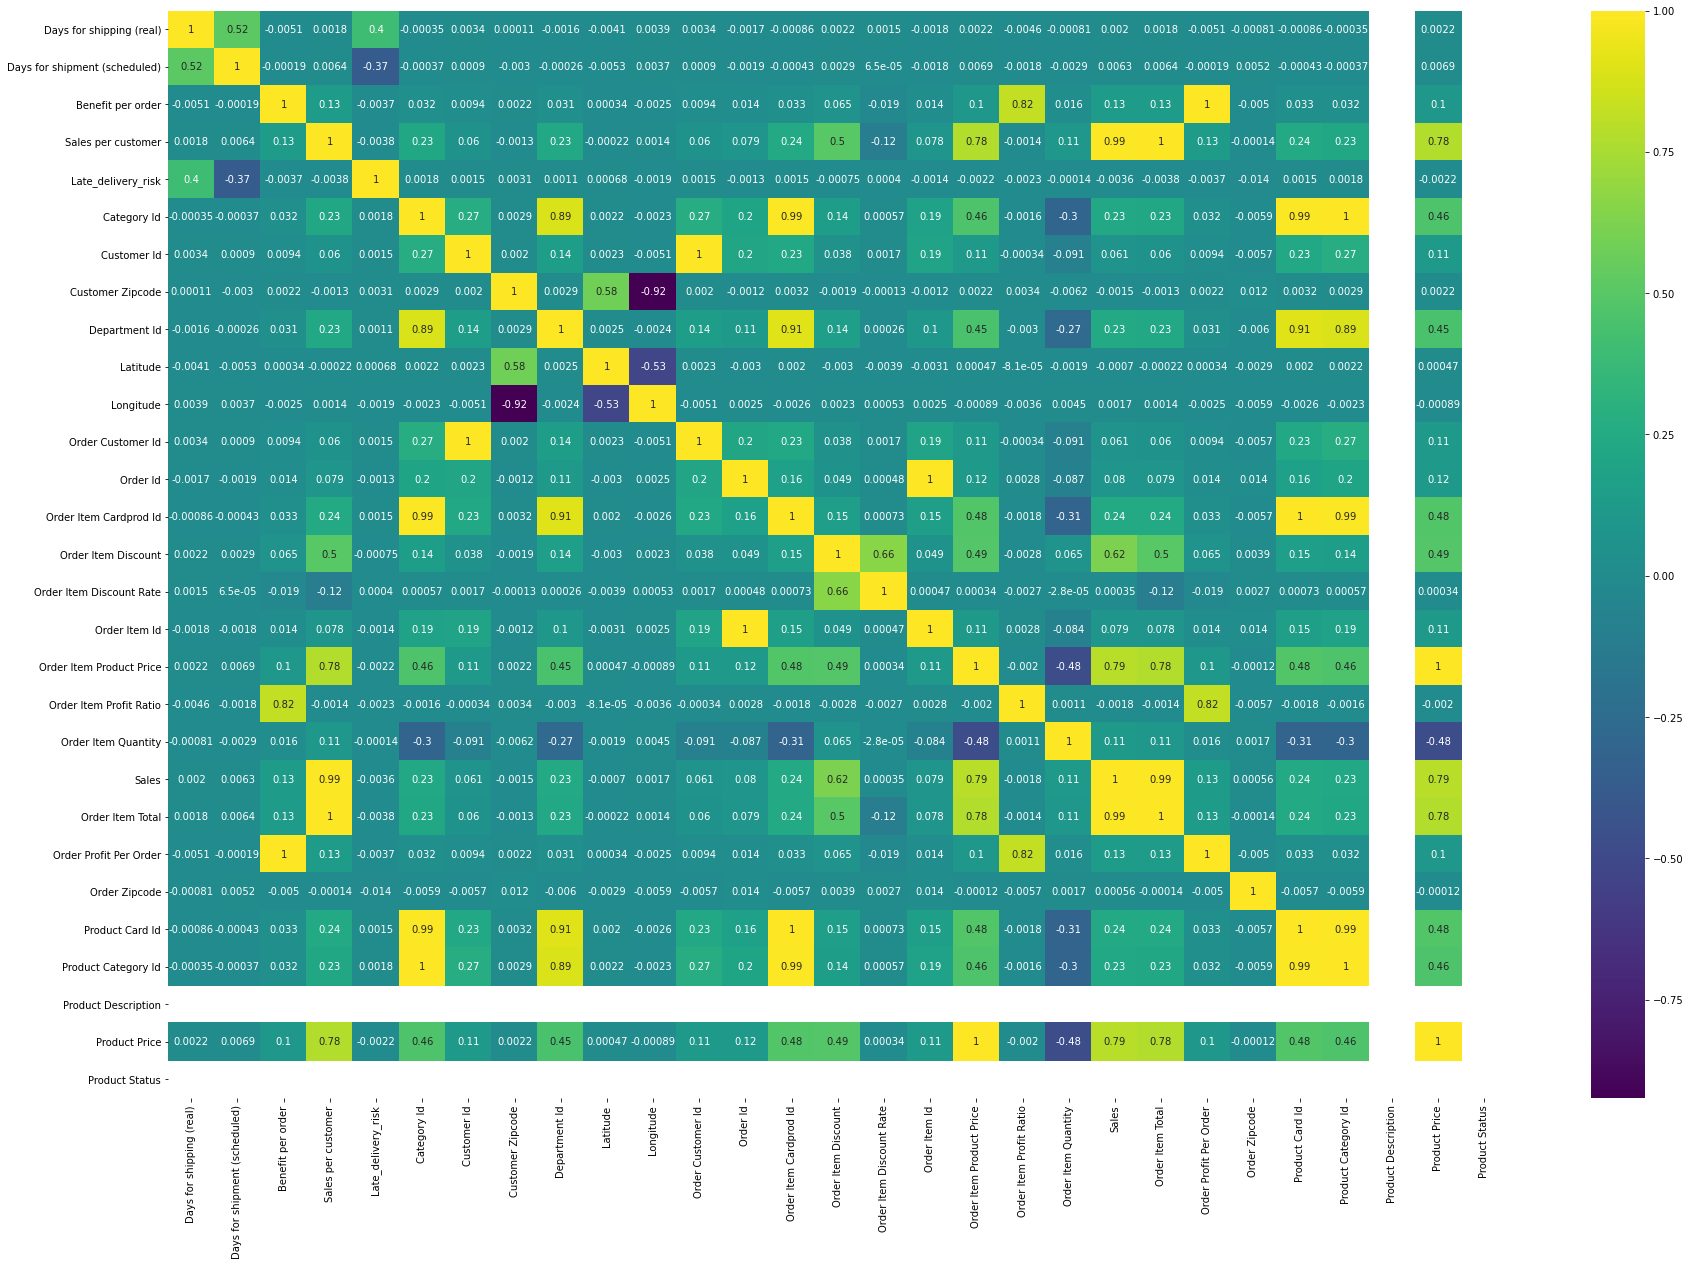

In [10]:
# heat maps to find any correlation betweeen variables
corrmap = data.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data[top].corr(),annot=True,cmap="viridis")

### Insights from Heatmap:
**1. Columns that are similar with same values but with different metadata (duplicate columns)**
  * Benefit per order, Order Profit per order
  * Sales per customer, Sales, Order Item Total
  * Category ID, Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
  * Order Item Product Price,Product Price
  A
  
**2. Unwanted features(null or less correlated values)**
  * Product Description
  * Product Status

## 3.4. Box plots for outlier analysis

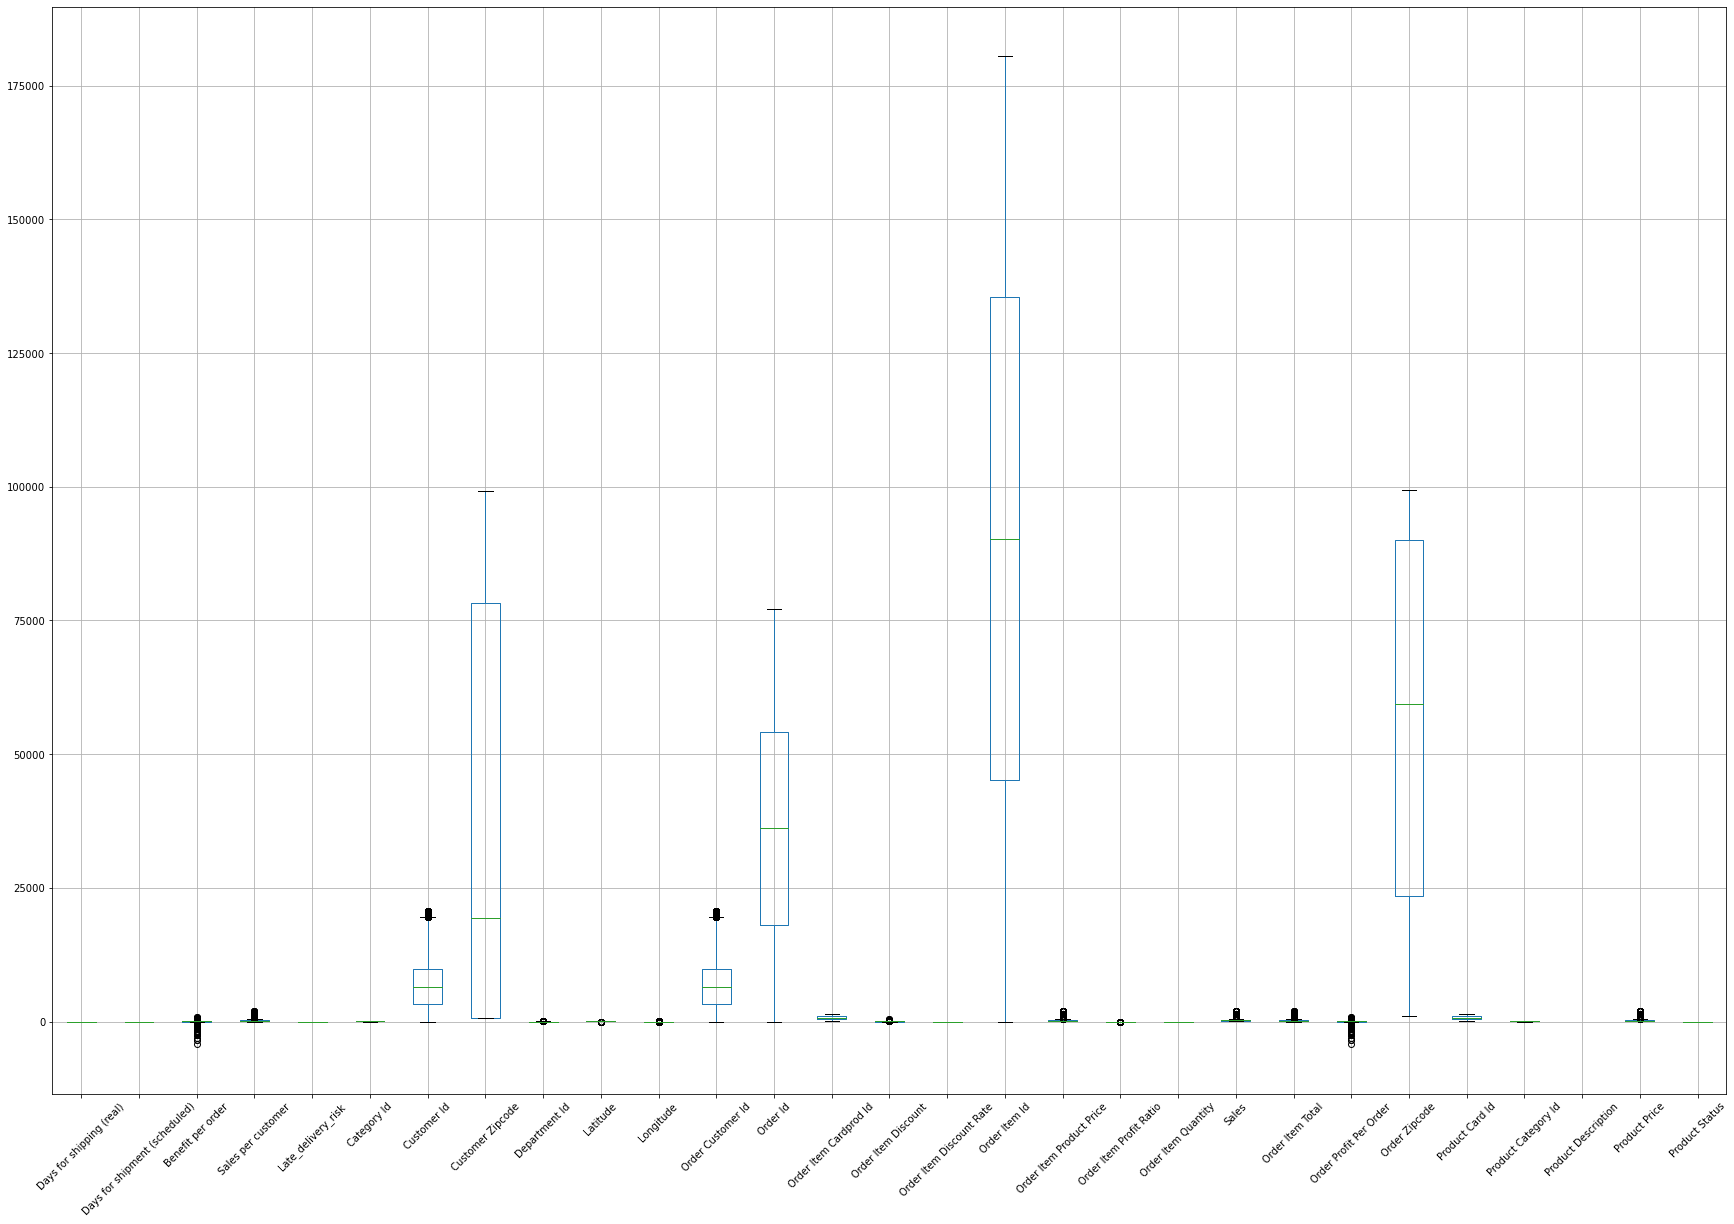

In [11]:
boxplot = data.boxplot(column=[f for f in data.columns if data[f].dtypes!='O'], figsize=(30,20), rot=45)

In [12]:
def outlier_data(data: pd.DataFrame, col: str) -> pd.DataFrame:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outlier = data[(data[col]<lower_bound)|(data[col]>upper_bound)][[col]]
    return outlier

In [13]:
num_cols = [f for f in data.columns if data[f].dtypes!='O']
print("Column : Number of outiers")
for col in num_cols:
    print(col," : ", len(outlier_data(data[num_cols], col)))

Column : Number of outiers
Days for shipping (real)  :  0
Days for shipment (scheduled)  :  0
Benefit per order  :  18942
Sales per customer  :  1943
Late_delivery_risk  :  0
Category Id  :  0
Customer Id  :  1198
Customer Zipcode  :  0
Department Id  :  362
Latitude  :  9
Longitude  :  1414
Order Customer Id  :  1198
Order Id  :  0
Order Item Cardprod Id  :  0
Order Item Discount  :  7537
Order Item Discount Rate  :  0
Order Item Id  :  0
Order Item Product Price  :  2048
Order Item Profit Ratio  :  17300
Order Item Quantity  :  0
Sales  :  488
Order Item Total  :  1943
Order Profit Per Order  :  18942
Order Zipcode  :  0
Product Card Id  :  0
Product Category Id  :  0
Product Description  :  0
Product Price  :  2048
Product Status  :  0


In [14]:
def remove_outlier(data: pd.DataFrame, col: str):
    for i in range(len(outlier_data(data, col)[col].unique())): # looping through each outlier value in current column
        out_lier_data = outlier_data(data, col)[col].unique() # getting the outlier data values

        # checking in case the current column has a outlier or not
        out = outlier_data(data, col)[col].unique()[0] if (len(out_lier_data) > 0) else None
        if out == None:
            continue

        index = data[data[col]==out].index.tolist() # get the index of outlier data
        data.drop(index, inplace = True)
    print("Outliers removed...")

In [15]:
test1 = data[num_cols].copy()
for i, col in enumerate(num_cols):
    print(col)
    remove_outlier(test1, col)

Days for shipping (real)
Outliers removed...
Days for shipment (scheduled)
Outliers removed...
Benefit per order
Outliers removed...
Sales per customer
Outliers removed...
Late_delivery_risk
Outliers removed...
Category Id
Outliers removed...
Customer Id
Outliers removed...
Customer Zipcode
Outliers removed...
Department Id
Outliers removed...
Latitude
Outliers removed...
Longitude
Outliers removed...
Order Customer Id
Outliers removed...
Order Id
Outliers removed...
Order Item Cardprod Id
Outliers removed...
Order Item Discount
Outliers removed...
Order Item Discount Rate
Outliers removed...
Order Item Id
Outliers removed...
Order Item Product Price
Outliers removed...
Order Item Profit Ratio
Outliers removed...
Order Item Quantity
Outliers removed...
Sales
Outliers removed...
Order Item Total
Outliers removed...
Order Profit Per Order
Outliers removed...
Order Zipcode
Outliers removed...
Product Card Id
Outliers removed...
Product Category Id
Outliers removed...
Product Description
O

In [16]:
for i, col in enumerate(num_cols):
    mean_change = round(((data[num_cols][col].mean()-test1[col].mean())/(data[num_cols][col].mean()+1e-8))*100, 6)
    median_change = round(((data[num_cols][col].median()-test1[col].median())/(data[num_cols][col].median()+1e-8))*100, 6)
    print(col)
    print("mean w outlier : ", round(data[num_cols][col].mean(), 6))
    print("mean w/o outlier : ", round(test1[col].mean(), 6))
    print("% change in mean after removing outlier : ", mean_change, "%")
    print("median w outlier : ", round(data[num_cols][col].median(), 6))
    print("median w/o outlier : ", round(test1[col].median(), 6))
    print("% change in median after removing outlier : ", median_change, "%")
    print('--------------------------------------------------')

Days for shipping (real)
mean w outlier :  3.497654
mean w/o outlier :  3.496098
% change in mean after removing outlier :  0.044473 %
median w outlier :  3.0
median w/o outlier :  3.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
Days for shipment (scheduled)
mean w outlier :  2.931847
mean w/o outlier :  2.928429
% change in mean after removing outlier :  0.116566 %
median w outlier :  4.0
median w/o outlier :  4.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
Benefit per order
mean w outlier :  21.974989
mean w/o outlier :  32.909212
% change in mean after removing outlier :  -49.757585 %
median w outlier :  31.52
median w/o outlier :  30.16
% change in median after removing outlier :  4.314723 %
--------------------------------------------------
Sales per customer
mean w outlier :  183.107609
mean w/o outlier :  133.305728
% change in mean after removing outlier :  27.198

# 4. Feature Engineering

**Splitting dataset into smaller datasets for domain usage and easier modelling**
1. Finance features
2. Shipment day estimation features

In [17]:
# we did not select the features that were similar to each other (found via correlation heatmap)

In [18]:
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
shipment = data[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping


In [19]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = data[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,134.210007,298.250000,29.500000,0.09,327.75,0.45


In [20]:
# Converting categorical features that represent date and time to datetime datatype.
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

In [21]:
# Handling Time and date variables
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

In [22]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,2018,1,15


In [23]:
data.shape

(180519, 61)

In [24]:
# Getting rid of irrelevant and redundant features

In [25]:
new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']
len(new_dataset_features)

21

In [26]:
new_data = data[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


In [27]:
# knowing the number of unique values in categorical columns
for f in list(new_data.columns):
    if new_data[f].dtypes == 'O':
        print(f,"->" , new_data[f].nunique())

Type -> 4
Shipping Mode -> 4
Order Status -> 9
Order Region -> 23
Order Country -> 164
Order City -> 3597
Market -> 5
Delivery Status -> 4


In [28]:
# One hot encoding categotical variables
model_data = pd.get_dummies(model_data, drop_first=True)
model_data.shape

(180519, 3815)

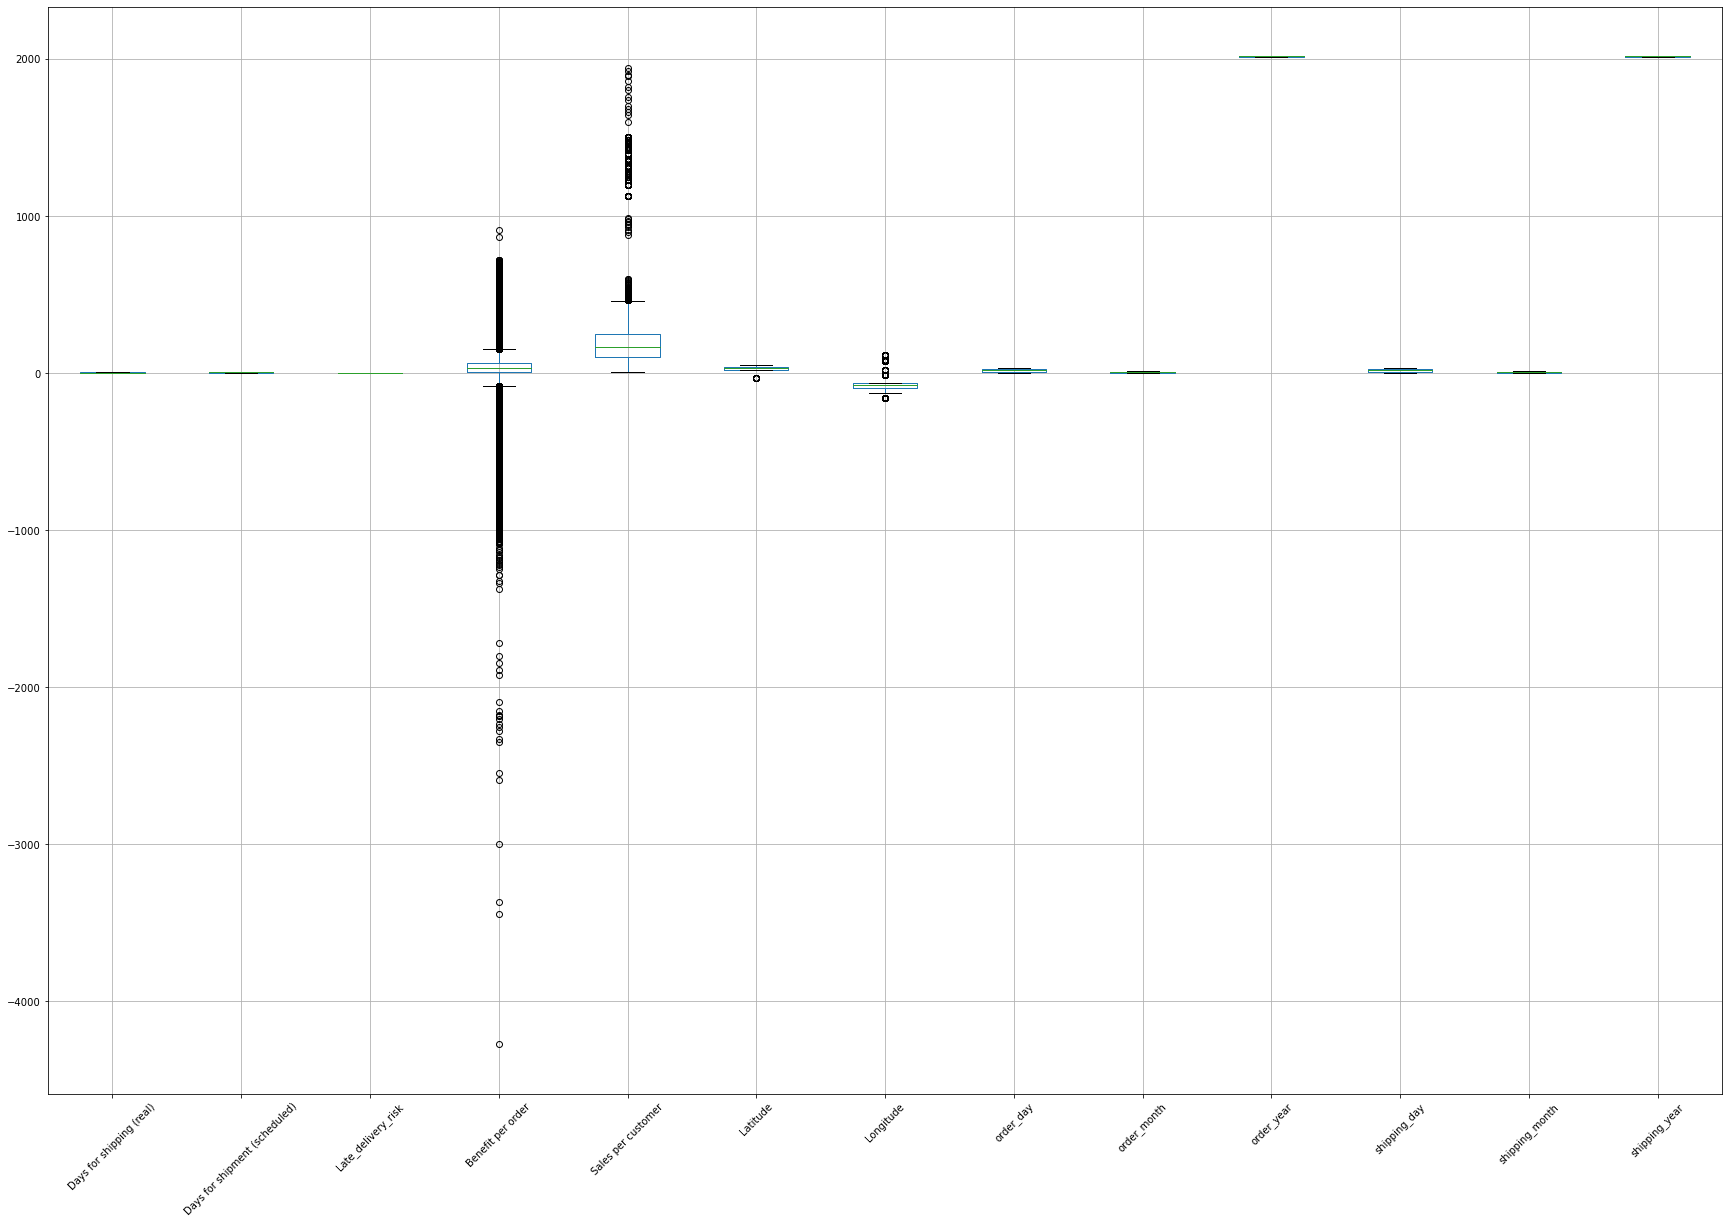

In [29]:
boxplot = data.boxplot(column=[f for f in new_data.columns if new_data[f].dtypes!='O'], figsize=(30,20), rot=45)

In [30]:
def outlier_data(data: pd.DataFrame, col: str) -> pd.DataFrame:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outlier = data[(data[col]<lower_bound)|(data[col]>upper_bound)][[col]]
    return outlier

In [31]:
new_num_cols = [f for f in new_data.columns if new_data[f].dtypes!='O']
print("Column : Number of outiers")
for col in new_num_cols:
    print(col," : ", len(outlier_data(new_data[new_num_cols], col)))

Column : Number of outiers
Days for shipping (real)  :  0
Days for shipment (scheduled)  :  0
Late_delivery_risk  :  0
Benefit per order  :  18942
Sales per customer  :  1943
Latitude  :  9
Longitude  :  1414
order_day  :  0
order_month  :  0
order_year  :  0
shipping_day  :  0
shipping_month  :  0
shipping_year  :  0


In [32]:
def remove_outlier(data: pd.DataFrame, col: str):
    for i in range(len(outlier_data(data, col)[col].unique())): # looping through each outlier value in current column
        out_lier_data = outlier_data(data, col)[col].unique() # getting the outlier data values

        # checking in case the current column has a outlier or not
        out = outlier_data(data, col)[col].unique()[0] if (len(out_lier_data) > 0) else None
        if out == None:
            continue

        index = data[data[col]==out].index.tolist() # get the index of outlier data
        data.drop(index, inplace = True)
    print("Outliers removed...")

In [33]:
test2 = new_data[new_num_cols].copy()
for i, col in enumerate(new_num_cols):
    print(col)
    remove_outlier(test2, col)

Days for shipping (real)
Outliers removed...
Days for shipment (scheduled)
Outliers removed...
Late_delivery_risk
Outliers removed...
Benefit per order
Outliers removed...
Sales per customer
Outliers removed...
Latitude
Outliers removed...
Longitude
Outliers removed...
order_day
Outliers removed...
order_month
Outliers removed...
order_year
Outliers removed...
shipping_day
Outliers removed...
shipping_month
Outliers removed...
shipping_year
Outliers removed...


In [34]:
for i, col in enumerate(new_num_cols):
    mean_change = round(((new_data[new_num_cols][col].mean()-test2[col].mean())/(new_data[new_num_cols][col].mean()+1e-8))*100, 6)
    median_change = round(((new_data[new_num_cols][col].median()-test2[col].median())/(new_data[new_num_cols][col].median()+1e-8))*100, 6)
    print(col)
    print("mean w outlier : ", round(new_data[new_num_cols][col].mean(), 6))
    print("mean w/o outlier : ", round(test2[col].mean(), 6))
    print("% change in mean after removing outlier : ", mean_change, "%")
    print("median w outlier : ", round(new_data[new_num_cols][col].median(), 6))
    print("median w/o outlier : ", round(test2[col].median(), 6))
    print("% change in median after removing outlier : ", median_change, "%")
    print('--------------------------------------------------')

Days for shipping (real)
mean w outlier :  3.497654
mean w/o outlier :  3.496317
% change in mean after removing outlier :  0.038235 %
median w outlier :  3.0
median w/o outlier :  3.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
Days for shipment (scheduled)
mean w outlier :  2.931847
mean w/o outlier :  2.931937
% change in mean after removing outlier :  -0.003084 %
median w outlier :  4.0
median w/o outlier :  4.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
Late_delivery_risk
mean w outlier :  0.548291
mean w/o outlier :  0.547633
% change in mean after removing outlier :  0.120022 %
median w outlier :  1.0
median w/o outlier :  1.0
% change in median after removing outlier :  0.0 %
--------------------------------------------------
Benefit per order
mean w outlier :  21.974989
mean w/o outlier :  36.92267
% change in mean after removing outlier :  -68.021336 %
median w

In [35]:
# 'Benefit per order' column has greatest impact on removing outliers

# 5. Model Building and Evaluation

## 5.1. Predicting fastest and normal shipping time
+ **Target features** -> Days for shipping (real), Days for shipment (scheduled)
+ **Problem type** -> Multi-output Regression

In [36]:
X = model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
print(X.shape, y.shape)

(180519, 3813) (180519, 2)


In [37]:
# performing train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# No Standard scaling is not required for tree-based algorithms (no need for normalization or standard scaling)

model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

model2=RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [39]:
y_pred1[:5] # (predicted actual days for shipping, predicted scheduled days for shipping)

array([[5., 4.],
       [2., 1.],
       [3., 4.],
       [5., 4.],
       [2., 4.]])

In [40]:
y_pred2[:5]

array([[5.09, 4.  ],
       [2.  , 1.  ],
       [2.28, 4.  ],
       [5.04, 4.  ],
       [2.08, 4.  ]])

## 5.2. Regression model evaluation

In [41]:
def eval(y_test,pred):
    r2 =r2_score(y_test,pred)
    mse =mean_squared_error(y_test,pred)
    mae =mean_absolute_error(y_test,pred)
    print('The r2 score of the model is ',r2)
    print('The mean squared error is',mse)
    print('The mean absolute error is',mae)

In [42]:
# Decision Tree
eval(y_test,y_pred1)

from sklearn.model_selection import cross_validate
cv_results1 = cross_validate(model1,X,y,cv=3,scoring=('r2')) # 3 fold cross validation
print(cv_results1)

The r2 score of the model is  0.9923242502666381
The mean squared error is 0.020233215156215376
The mean absolute error is 0.018266674052736537
{'fit_time': array([37.04892063, 39.23608088, 40.14608312]), 'score_time': array([1.0804975 , 1.07161355, 1.07825327]), 'test_score': array([0.97125755, 0.98078232, 0.98056962])}


In [43]:
# Random Forest
eval(y_test,y_pred2)
cv_results2 = cross_validate(model2,X,y,cv=3,scoring=('r2'))
print(cv_results2) 

The r2 score of the model is  0.9969481056193457
The mean squared error is 0.008044769277642822
The mean absolute error is 0.030498144249942318
{'fit_time': array([2336.88620305, 2379.60162091, 2193.56023526]), 'score_time': array([2.800457  , 3.20499206, 2.85267115]), 'test_score': array([0.99438293, 0.99219703, 0.99147713])}


# 6. Late Delivery Analysis

In [44]:
# Converting the predicted output array to a dataframe
Prediction1 = pd.DataFrame(y_pred1)
prediction1 = Prediction1.rename(columns={0:'Predicted_real_shipment_time',1:'Predicted_scheduled_shipment_time'})
prediction1.head()

,Predicted_real_shipment_time,Predicted_scheduled_shipment_time
0,5.0,4.0
1,2.0,1.0
2,3.0,4.0
3,5.0,4.0
4,2.0,4.0


In [45]:
Prediction2 = pd.DataFrame(y_pred2)
prediction2 = Prediction2.rename(columns={0:'Predicted_real_shipment_time',1:'Predicted_scheduled_shipment_time'})
prediction2.head()

,Predicted_real_shipment_time,Predicted_scheduled_shipment_time
0,5.09,4.0
1,2.00,1.0
2,2.28,4.0
3,5.04,4.0
4,2.08,4.0


The comparison between **Predicted_real_shipment_time** and **Predicted_scheduled_shipment_time** itself makes the prediction of whether the delivery is late or not.
+ *Predicted_real_shipment_time* **being less than or equal to** *Predicted_scheduled_shipment_time* implies **No late delivery risk (0)**
+ *Predicted_real_shipment_time* **being greater than** *Predicted_scheduled_shipment_time* implies **Late delivery risk (1)**

In [46]:
prediction1['Late_risk'] = np.where(prediction1['Predicted_real_shipment_time'] <= prediction1['Predicted_scheduled_shipment_time'],0,1)

In [47]:
prediction2['Late_risk'] = np.where(prediction2['Predicted_real_shipment_time'] <= prediction2['Predicted_scheduled_shipment_time'],0,1)

In [48]:
prediction1.head()

,Predicted_real_shipment_time,Predicted_scheduled_shipment_time,Late_risk
0,5.0,4.0,1
1,2.0,1.0,1
2,3.0,4.0,0
3,5.0,4.0,1
4,2.0,4.0,0


In [49]:
prediction2.head()

,Predicted_real_shipment_time,Predicted_scheduled_shipment_time,Late_risk
0,5.09,4.0,1
1,2.00,1.0,1
2,2.28,4.0,0
3,5.04,4.0,1
4,2.08,4.0,0


## Late delivery risk model evaluation

In [50]:
pred1 = prediction1['Late_risk']
pred2 = prediction2['Late_risk']
actual = X_test['Late_delivery_risk']

In [51]:
def evaluate_risk_factor(true,pred):
    print("Accuracy of the risk predictor model: ", accuracy_score(true,pred))
    print("AUC-ROC score: ",roc_auc_score(true,pred))
    print("Some key classification metrics:","\n")
    print(classification_report(true,pred))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(true,pred),annot=True,ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion matrix for Risk Delivery classfication')

Accuracy of the risk predictor model:  0.9748781298471083
AUC-ROC score:  0.9721898571165757
Some key classification metrics: 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



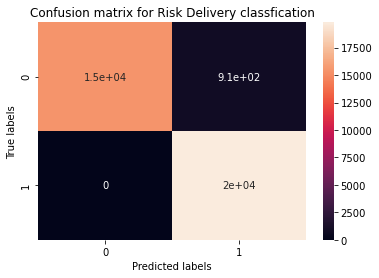

In [52]:
evaluate_risk_factor(actual, pred1)

Accuracy of the risk predictor model:  0.9693939729669843
AUC-ROC score:  0.9661188446679341
Some key classification metrics: 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16307
           1       0.95      1.00      0.97     19797

    accuracy                           0.97     36104
   macro avg       0.97      0.97      0.97     36104
weighted avg       0.97      0.97      0.97     36104



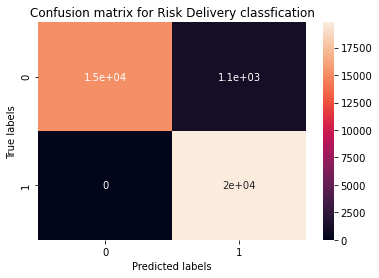

In [53]:
evaluate_risk_factor(actual, pred2)

Text(0.5, 1.0, 'Predicted Late delivery risks (DT)')

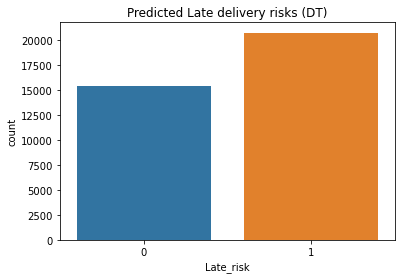

In [54]:
sns.countplot(x="Late_risk",data=prediction1).set_title("Predicted Late delivery risks (DT)")

Text(0.5, 1.0, 'Predicted Late delivery risks (RF)')

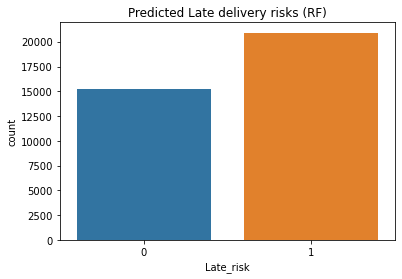

In [55]:
sns.countplot(x="Late_risk",data=prediction2).set_title("Predicted Late delivery risks (RF)")

Text(0.5, 1.0, 'Actual Late delivery risk')

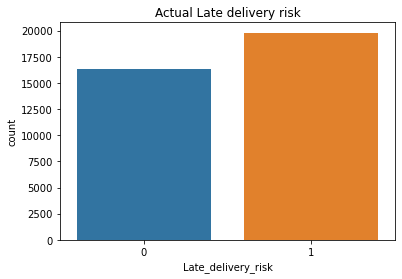

In [56]:
sns.countplot(x='Late_delivery_risk',data=X_test).set_title('Actual Late delivery risk')